In [1]:
##Prepare rules for the all the data sets 
##1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
##2) Change the minimum length in apriori algorithm
##3) Visulize the obtained rules using different plots 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
Movie=pd.read_csv("C:/Users/Vijay Rathod/Downloads/my_movies.csv")
Movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [6]:
##Pre-Processing
##Since few of the columns in the Data Set are catagorical we will need to use transaction Encoder

In [7]:
movie_pp=pd.get_dummies(Movie)
movie_pp.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [9]:
### Checking for null values
movie_pp.isnull().sum()

Sixth Sense         0
Gladiator           0
LOTR1               0
Harry Potter1       0
Patriot             0
LOTR2               0
Harry Potter2       0
LOTR                0
Braveheart          0
Green Mile          0
V1_Gladiator        0
V1_Harry Potter1    0
V1_LOTR1            0
V1_Sixth Sense      0
V2_Harry Potter2    0
V2_LOTR             0
V2_LOTR1            0
V2_LOTR2            0
V2_Patriot          0
V3_Braveheart       0
V3_Gladiator        0
V3_Harry Potter1    0
V3_Sixth Sense      0
V4_Green Mile       0
V5_LOTR2            0
dtype: int64

In [10]:
#### Using Apriori Algorithm
### for minimum support 0.1

In [14]:
frequent_itamset=apriori(movie_pp,min_support=0.1,use_colnames=True)
frequent_itamset.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [17]:
rules=association_rules(frequent_itamset,metric='confidence',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(LOTR2, V5_LOTR2)","(LOTR1, V3_Harry Potter1, V2_LOTR1, V4_Green M...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(V1_Sixth Sense, V5_LOTR2)","(LOTR1, V3_Harry Potter1, V2_LOTR1, V4_Green M...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V3_Harry Potter1),"(LOTR1, V2_LOTR1, Green Mile, V4_Green Mile, S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V2_LOTR1),"(LOTR1, V3_Harry Potter1, Green Mile, V4_Green...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [18]:
## leverage value of 0 indicates independence. Range will be [-1 1]
##A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [23]:
rules.sort_values('confidence',ascending=False)[0:20]
rules[rules.confidence>0.9]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
5,(V2_LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
6,(V2_LOTR1),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
56755,"(LOTR2, V5_LOTR2)","(LOTR1, V3_Harry Potter1, V2_LOTR1, V4_Green M...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56756,"(V1_Sixth Sense, V5_LOTR2)","(LOTR1, V3_Harry Potter1, V2_LOTR1, V4_Green M...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56757,(V3_Harry Potter1),"(LOTR1, V2_LOTR1, Green Mile, V4_Green Mile, S...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56758,(V2_LOTR1),"(LOTR1, V3_Harry Potter1, Green Mile, V4_Green...",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [24]:
### Visulizeing the obtained rules using different plots 

C:\Users\Vijay Rathod\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='confidence', ylabel='Density'>

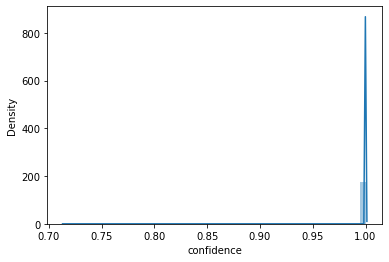

In [27]:
sns.distplot(rules['confidence'])

C:\Users\Vijay Rathod\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lift', ylabel='Density'>

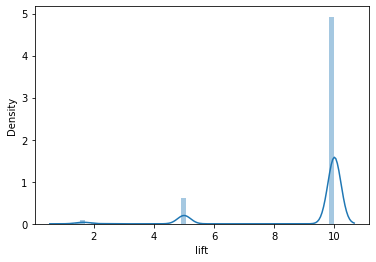

In [28]:
sns.distplot(rules['lift'])

array([[<AxesSubplot:title={'center':'confidence'}>]], dtype=object)

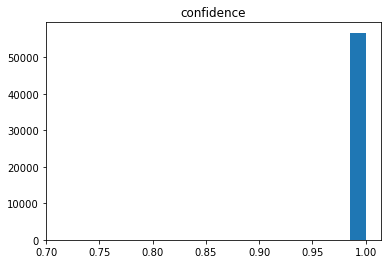

In [41]:
rules.hist('confidence',grid=False ,bins=20)

array([[<AxesSubplot:title={'center':'lift'}>]], dtype=object)

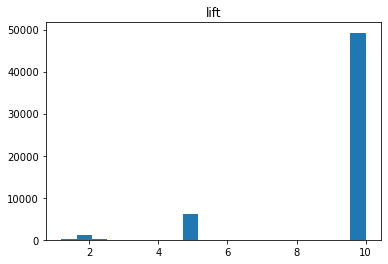

In [44]:
rules.hist('lift',grid=False ,bins=20)

In [36]:
## Apriori Algorithm
## for Minimum Support = 0.09


In [35]:
frequent_itemset1=apriori(movie_pp,min_support=0.09,use_colnames=True)
frequent_itemset1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(LOTR1, V3_Harry Potter1, V2_LOTR1, V4_Green M..."
1393,0.1,"(LOTR1, V3_Harry Potter1, V2_LOTR1, Green Mile..."
1394,0.1,"(V3_Harry Potter1, V2_LOTR1, V4_Green Mile, Si..."
1395,0.1,"(LOTR1, V3_Harry Potter1, V2_LOTR1, Green Mile..."


In [38]:
rules1=association_rules(frequent_itemset1,metric='confidence',min_threshold=0.7)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(LOTR2, V5_LOTR2)","(LOTR1, V3_Harry Potter1, V2_LOTR1, V4_Green M...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(V1_Sixth Sense, V5_LOTR2)","(LOTR1, V3_Harry Potter1, V2_LOTR1, V4_Green M...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V3_Harry Potter1),"(LOTR1, V2_LOTR1, Green Mile, V4_Green Mile, S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V2_LOTR1),"(LOTR1, V3_Harry Potter1, Green Mile, V4_Green...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [40]:
rules1.sort_values('confidence',ascending=False)[0:20]
rules1[rules1.confidence>0.9]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
5,(V2_LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
6,(V2_LOTR1),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
56755,"(LOTR2, V5_LOTR2)","(LOTR1, V3_Harry Potter1, V2_LOTR1, V4_Green M...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56756,"(V1_Sixth Sense, V5_LOTR2)","(LOTR1, V3_Harry Potter1, V2_LOTR1, V4_Green M...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56757,(V3_Harry Potter1),"(LOTR1, V2_LOTR1, Green Mile, V4_Green Mile, S...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56758,(V2_LOTR1),"(LOTR1, V3_Harry Potter1, Green Mile, V4_Green...",0.1,0.1,0.1,1.0,10.000000,0.09,inf


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='confidence', ylabel='Density'>

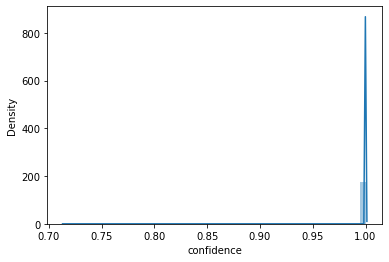

In [45]:
sns.distplot(rules1['confidence'])

C:\Users\Vijay Rathod\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lift', ylabel='Density'>

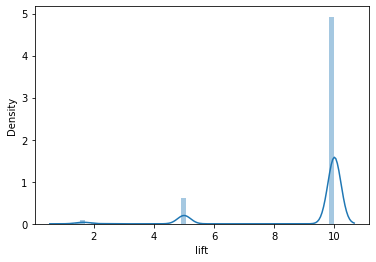

In [46]:
sns.distplot(rules1['lift'])

array([[<AxesSubplot:title={'center':'lift'}>]], dtype=object)

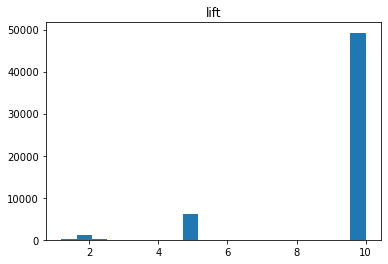

In [47]:
rules1.hist('lift',grid=False ,bins=20)

array([[<AxesSubplot:title={'center':'confidence'}>]], dtype=object)

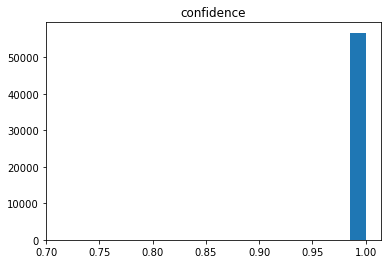

In [42]:
rules1.hist('confidence',grid=False ,bins=20)